In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# read data
data = pd.read_csv("./data/data.csv",delimiter=";")
#print(data)

In [3]:
# splitting data into two dataframes by column AB_Cohort
# Разделение данных на два DataFrame по значению столбца "AB_Cohort"
data_cohort_A = data[data['AB_Cohort'] == 'A']
data_cohort_B = data[data['AB_Cohort'] == 'B']

# Сохранение двух DataFrame в файлы CSV
data_cohort_A.to_csv("./data_proc/data_cohort_A.csv", index=False)
data_cohort_B.to_csv("./data_proc/data_cohort_B.csv", index=False)

In [4]:
#1.1 Retention and Churn Rate

# Функция для вычисления Retention и Churn Rate
def calculate_retention_churn(data, filter_by_purchase=False):
    # Создаем словарь для хранения Retention и Churn Rate для каждого дня
    retention_dict = {}
    churn_dict = {}

    # Фильтруем данные, оставляя только пользователей с покупками, если необходимо
    if filter_by_purchase:
        data = data[data['CountBuy'] > 0]

    total_users = data['User_id'].nunique()

    # Инициализируем значения для дня 0 (установки)
    retention_dict[0] = 100.0  # 100% удержание в день установки
    churn_dict[0] = 0.0  # 0% отток в день установки

    # Проходим по строкам данных и обновляем Retention и Churn Rate
    for day in range(1, 8):  # Начинаем с первого дня, так как день 0 уже инициализирован
        retained_users = data[data['Retention'] >= day]['User_id'].nunique()

        retention_rate = (retained_users / total_users) * 100
        churn_rate = 100 - retention_rate

        retention_dict[day] = retention_rate
        churn_dict[day] = churn_rate

    # Создаем DataFrame из словарей
    retention_churn_df = pd.DataFrame({'Day': list(retention_dict.keys()),
                                       'Retention Rate (%)': list(retention_dict.values()),
                                       'Churn Rate (%)': list(churn_dict.values())})

    return retention_churn_df

# Вычисляем Retention и Churn Rate для когорты A и B с учетом покупок и без учета
retention_cohort_A_all_df = calculate_retention_churn(data_cohort_A)
retention_cohort_B_all_df = calculate_retention_churn(data_cohort_B)
retention_cohort_A_purchase_df = calculate_retention_churn(data_cohort_A, filter_by_purchase=True)
retention_cohort_B_purchase_df = calculate_retention_churn(data_cohort_B, filter_by_purchase=True)

# Вывести результаты
print("result_cohort_A (All Users):", retention_cohort_A_all_df)
print("result_cohort_B (All Users):", retention_cohort_B_all_df)
print("result_cohort_A (Purchase Users):", retention_cohort_A_purchase_df)
print("result_cohort_B (Purchase Users):", retention_cohort_B_purchase_df)



result_cohort_A (All Users):    Day  Retention Rate (%)  Churn Rate (%)
0    0          100.000000        0.000000
1    1           52.483901       47.516099
2    2           45.860166       54.139834
3    3           41.835327       58.164673
4    4           37.971481       62.028519
5    5           33.578657       66.421343
6    6           28.449862       71.550138
7    7           22.079117       77.920883
result_cohort_B (All Users):    Day  Retention Rate (%)  Churn Rate (%)
0    0          100.000000        0.000000
1    1           55.171619       44.828381
2    2           47.385395       52.614605
3    3           42.271366       57.728634
4    4           38.124856       61.875144
5    5           33.471550       66.528450
6    6           28.587883       71.412117
7    7           21.101129       78.898871
result_cohort_A (Purchase Users):    Day  Retention Rate (%)  Churn Rate (%)
0    0               100.0             0.0
1    1                68.0            32.0
2    

In [5]:
%store retention_cohort_A_all_df
%store retention_cohort_B_all_df
%store retention_cohort_A_purchase_df
%store retention_cohort_B_purchase_df

Stored 'retention_cohort_A_all_df' (DataFrame)
Stored 'retention_cohort_B_all_df' (DataFrame)
Stored 'retention_cohort_A_purchase_df' (DataFrame)
Stored 'retention_cohort_B_purchase_df' (DataFrame)


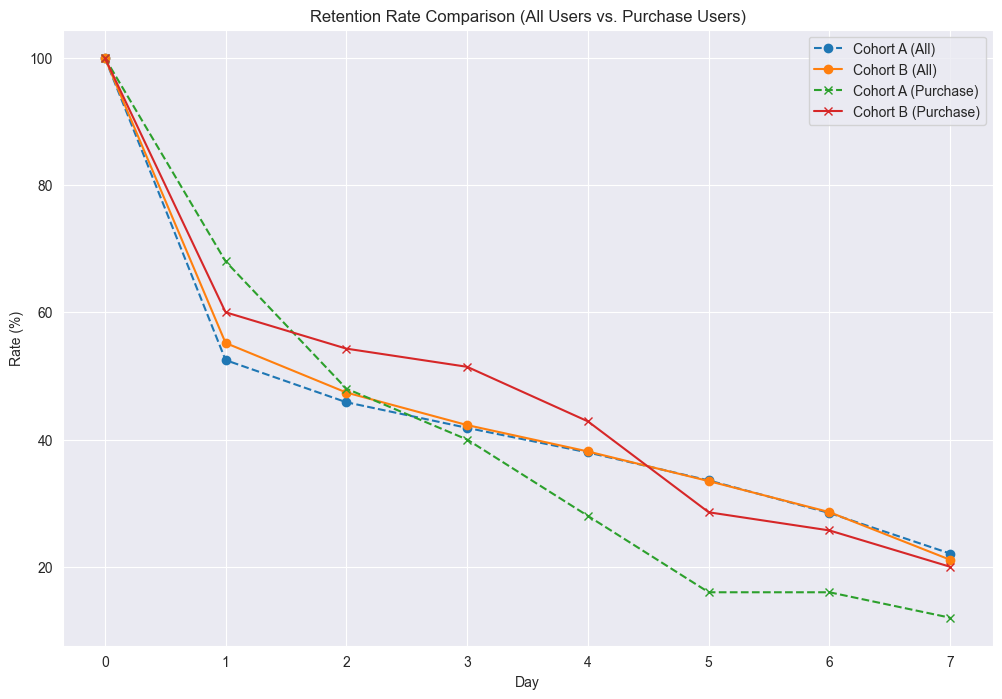

In [6]:
#1.2 Retention graph
# Строим графики для всех пользователей и только для пользователей с покупками
plt.figure(figsize=(12, 8))

# График Retention Rate для всех пользователей
plt.plot(retention_cohort_A_all_df['Day'], retention_cohort_A_all_df['Retention Rate (%)'], label='Cohort A (All)',linestyle='--', marker='o')
plt.plot(retention_cohort_B_all_df['Day'], retention_cohort_B_all_df['Retention Rate (%)'], label='Cohort B (All)', marker='o')

# График Retention Rate только для пользователей с покупками
plt.plot(retention_cohort_A_purchase_df['Day'], retention_cohort_A_purchase_df['Retention Rate (%)'], label='Cohort A (Purchase)', linestyle='--', marker='x')
plt.plot(retention_cohort_B_purchase_df['Day'], retention_cohort_B_purchase_df['Retention Rate (%)'], label='Cohort B (Purchase)', marker='x')

# Настройки графика
plt.title('Retention Rate Comparison (All Users vs. Purchase Users)')
plt.xlabel('Day')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()



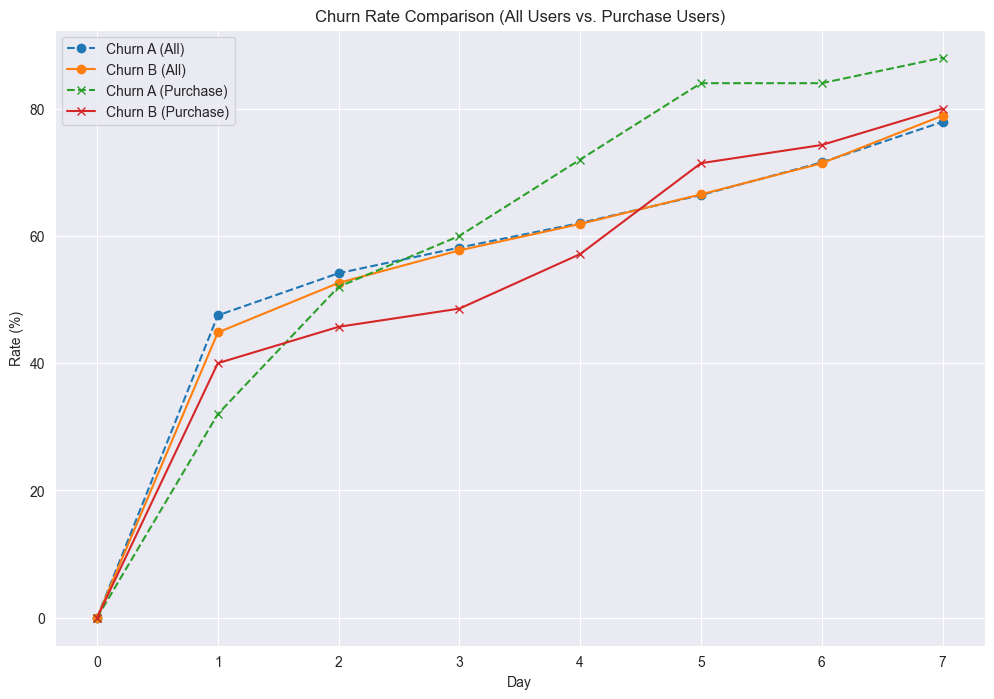

In [7]:
#1.3 Churn Rate graph
# Строим графики для всех пользователей и только для пользователей с покупками для Churn Rate
plt.figure(figsize=(12, 8))

# График Churn Rate для всех пользователей
plt.plot(retention_cohort_A_all_df['Day'], retention_cohort_A_all_df['Churn Rate (%)'], label='Churn A (All)',linestyle='--', marker='o')
plt.plot(retention_cohort_B_all_df['Day'], retention_cohort_B_all_df['Churn Rate (%)'], label='Churn B (All)', marker='o')

# График Churn Rate только для пользователей с покупками
plt.plot(retention_cohort_A_purchase_df['Day'], retention_cohort_A_purchase_df['Churn Rate (%)'], label='Churn A (Purchase)', linestyle='--', marker='x')
plt.plot(retention_cohort_B_purchase_df['Day'], retention_cohort_B_purchase_df['Churn Rate (%)'], label='Churn B (Purchase)', marker='x')

# Настройки графика
plt.title('Churn Rate Comparison (All Users vs. Purchase Users)')
plt.xlabel('Day')
plt.ylabel('Rate (%)')
plt.legend()
plt.grid(True)

# Отображение графика
plt.show()


In [8]:
#2.1 new Fuuu factor (by users)
# Функция для вычисления FUUU по дням и суммарно

def calculate_fuuu(data, filter_by_purchase=False):
    fuuu_overall_by_day = []
    fuuu_clean_by_day = []

    for day in range(8):  # Включая день 0 (установки)
        """
        if day == 0:
            continue  # Пропускаем день 0
        """
        day_data = data[data['Retention'] == day]

        # Фильтруем данные, оставляя только пользователей с покупками, если необходимо
        if filter_by_purchase:
            day_data = day_data[day_data['CountBuy'] > 0]

        count_all_start = day_data.groupby('User_id')['CountAllStart'].sum()
        count_all_finish = day_data.groupby('User_id')['CountAllFinish'].sum()
        count_clean_start = day_data.groupby('User_id')['CountCleanStart'].sum()
        count_clean_finish = day_data.groupby('User_id')['CountCleanFinish'].sum()

        fuuu_overall = count_all_finish / count_all_start
        fuuu_clean = count_clean_finish / count_clean_start

        # Игнорируем значения nan при вычислении среднего значения
        fuuu_overall_mean = np.nanmean(fuuu_overall)
        fuuu_clean_mean = np.nanmean(fuuu_clean)

        fuuu_overall_by_day.append(fuuu_overall_mean)
        fuuu_clean_by_day.append(fuuu_clean_mean)

    # Вычисляем среднее значение за все дни
    fuuu_overall_avg = np.nanmean(fuuu_overall_by_day)
    fuuu_clean_avg = np.nanmean(fuuu_clean_by_day)

    return fuuu_overall_by_day, fuuu_clean_by_day, fuuu_overall_avg, fuuu_clean_avg


# Вычисляем FUUU для когорты A по дням и суммарно для всех пользователей и только для пользователей с покупками
fuuu_A_overall_by_day_all, fuuu_A_clean_by_day_all, fuuu_A_overall_sum_all, fuuu_A_clean_sum_all = calculate_fuuu(data_cohort_A)
fuuu_A_overall_by_day_purchase, fuuu_A_clean_by_day_purchase, fuuu_A_overall_sum_purchase, fuuu_A_clean_sum_purchase = calculate_fuuu(data_cohort_A, filter_by_purchase=True)

# Вычисляем FUUU для когорты B по дням и суммарно для всех пользователей и только для пользователей с покупками
fuuu_B_overall_by_day_all, fuuu_B_clean_by_day_all, fuuu_B_overall_sum_all, fuuu_B_clean_sum_all = calculate_fuuu(data_cohort_B)
fuuu_B_overall_by_day_purchase, fuuu_B_clean_by_day_purchase, fuuu_B_overall_sum_purchase, fuuu_B_clean_sum_purchase = calculate_fuuu(data_cohort_B, filter_by_purchase=True)

# Вывод результатов
print("FUUU Overall by Day (Cohort A - All Users):", fuuu_A_overall_by_day_all)
print("FUUU Clean by Day (Cohort A - All Users):", fuuu_A_clean_by_day_all)
print("FUUU Overall Avg (Cohort A - All Users):", fuuu_A_overall_sum_all)
print("FUUU Clean Avg (Cohort A - All Users):", fuuu_A_clean_sum_all)

print("FUUU Overall by Day (Cohort A - Purchase Users):", fuuu_A_overall_by_day_purchase)
print("FUUU Clean by Day (Cohort A - Purchase Users):", fuuu_A_clean_by_day_purchase)
print("FUUU Overall Avg (Cohort A - Purchase Users):", fuuu_A_overall_sum_purchase)
print("FUUU Clean Avg (Cohort A - Purchase Users):", fuuu_A_clean_sum_purchase)

print("FUUU Overall by Day (Cohort B - All Users):", fuuu_B_overall_by_day_all)
print("FUUU Clean by Day (Cohort B - All Users):", fuuu_B_clean_by_day_all)
print("FUUU Overall Avg (Cohort B - All Users):", fuuu_B_overall_sum_all)
print("FUUU Clean Avg (Cohort B - All Users):", fuuu_B_clean_sum_all)

print("FUUU Overall by Day (Cohort B - Purchase Users):", fuuu_B_overall_by_day_purchase)
print("FUUU Clean by Day (Cohort B - Purchase Users):", fuuu_B_clean_by_day_purchase)
print("FUUU Overall Avg (Cohort B - Purchase Users):", fuuu_B_overall_sum_purchase)
print("FUUU Clean Avg (Cohort B - Purchase Users):", fuuu_B_clean_sum_purchase)


FUUU Overall by Day (Cohort A - All Users): [0.5821582822632144, 0.32536798875191963, 0.24723462287767073, 0.21794464437994954, 0.19436646922729311, 0.22326044677286633, 0.2039874740248802, 0.17927059230154227]
FUUU Clean by Day (Cohort A - All Users): [0.575619862516813, 0.30630555445253144, 0.22819147969857295, 0.20310362172829038, 0.17541836077722783, 0.20953811921166082, 0.18896611034473426, 0.16336895195819917]
FUUU Overall Avg (Cohort A - All Users): 0.271698815074917
FUUU Clean Avg (Cohort A - All Users): 0.25631400758600376
FUUU Overall by Day (Cohort A - Purchase Users): [0.37477855477855476, 0.3762649017632959, 0.2760619010619011, 0.1943392255892256, 0.06515151515151515, 0.2631578947368421, 0.5909090909090909, 0.1754276178556529]
FUUU Clean by Day (Cohort A - Purchase Users): [0.2720144738746562, 0.3419241982507289, 0.243996891996892, 0.1286303107165504, 0.017241379310344827, 0.20754716981132076, 0.5568181818181818, 0.14404761904761906]
FUUU Overall Avg (Cohort A - Purchase U

C:\Users\User\AppData\Local\Temp\ipykernel_20768\999874254.py:28: RuntimeWarning: Mean of empty slice
  fuuu_overall_mean = np.nanmean(fuuu_overall)
C:\Users\User\AppData\Local\Temp\ipykernel_20768\999874254.py:29: RuntimeWarning: Mean of empty slice
  fuuu_clean_mean = np.nanmean(fuuu_clean)


In [9]:
day_5_data = data_cohort_B[data_cohort_B['Retention'] == 5]

# Для purchase users
purchase_users_data = day_5_data[day_5_data['CountBuy'] > 0]

# Характеристики для overall в 5 день (purchase users)
print("Overall in 5th Day (Purchase Users - Cohort B):")
print(purchase_users_data[['User_id', 'CountAllStart', 'CountAllFinish']])

# Характеристики для clean в 5 день (purchase users)
print("Clean in 5th Day (Purchase Users - Cohort B):")
print(purchase_users_data[['User_id', 'CountCleanStart', 'CountCleanFinish']])


Overall in 5th Day (Purchase Users - Cohort B):
       User_id  CountAllStart  CountAllFinish
16271     1196              0               0
Clean in 5th Day (Purchase Users - Cohort B):
       User_id  CountCleanStart  CountCleanFinish
16271     1196                0                 0


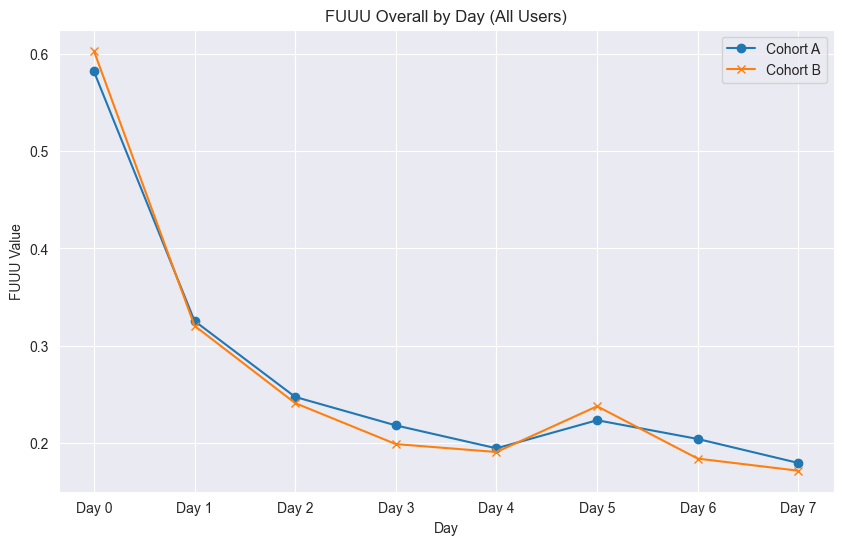

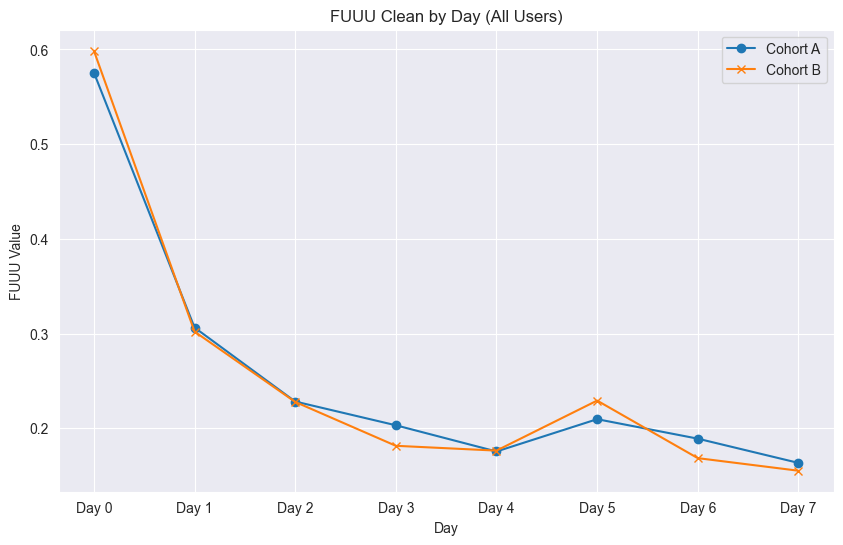

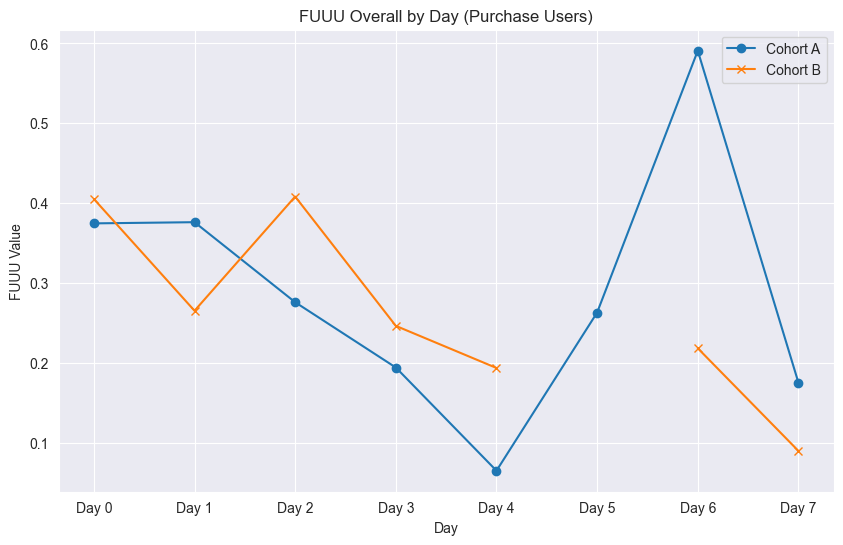

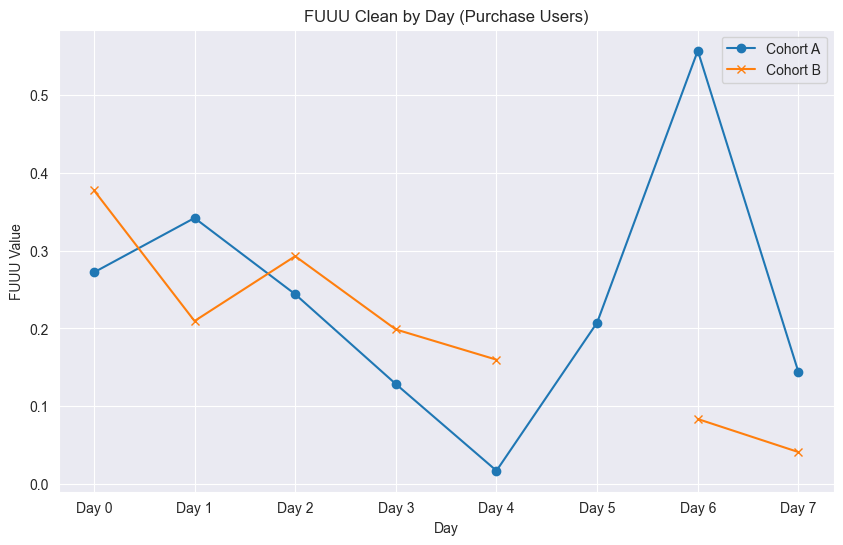

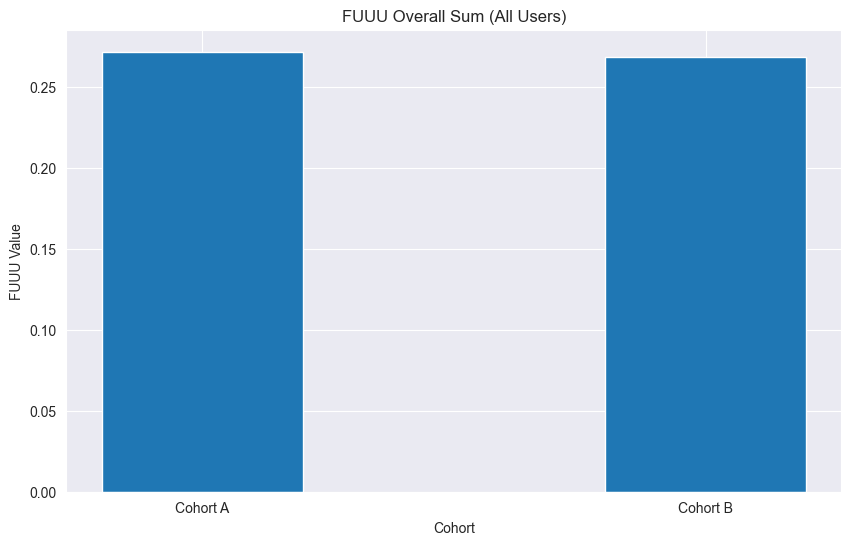

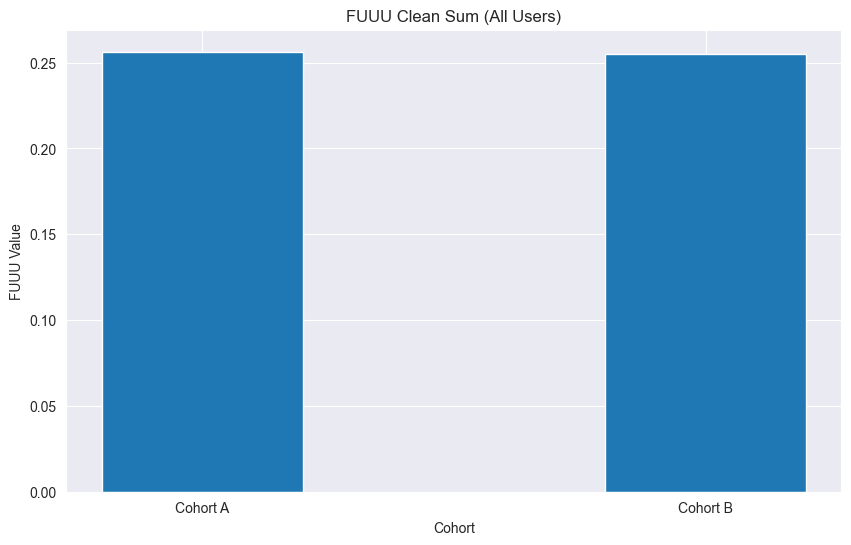

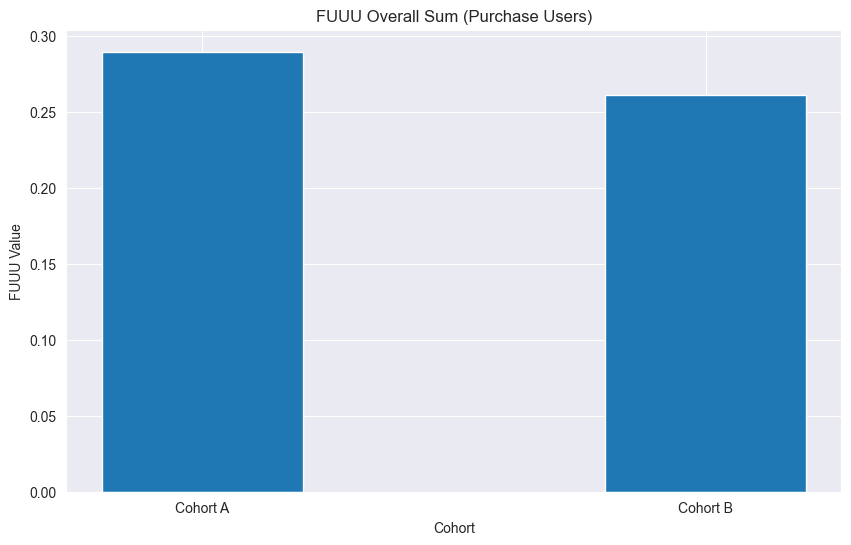

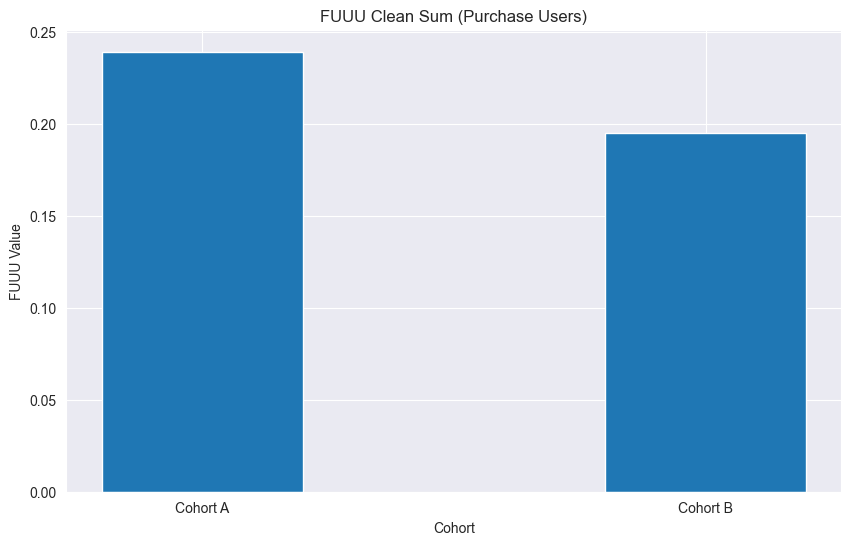

In [10]:
#2.2 new Fuuu factor (by users) graph
import matplotlib.pyplot as plt
import numpy as np

# Создаем функцию для построения графика с сравнением когорт
def plot_fuuu_comparison(data1, data2, title, labels):
    plt.figure(figsize=(10, 6))
    x = np.arange(len(data1))
    width = 0.4
    plt.plot(x, data1, marker='o', label=labels[0])
    plt.plot(x, data2, marker='x', label=labels[1])
    plt.title(title)
    plt.xlabel('Day')
    plt.ylabel('FUUU Value')
    plt.xticks(x, ['Day 0','Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7'])
    plt.legend()
    plt.grid(True)
    plt.show()

# Создаем функцию для построения гистограммы с сравнением когорт
def plot_fuuu_histogram(data, title, labels):
    plt.figure(figsize=(10, 6))
    x = np.arange(len(data))
    width = 0.4
    plt.bar(x, data, width)
    plt.title(title)
    plt.xlabel('Cohort')
    plt.ylabel('FUUU Value')
    plt.xticks(x, labels)
    plt.grid(True)
    plt.show()

# Постройте 4 графика с сравнением когорт
plot_fuuu_comparison(fuuu_A_overall_by_day_all, fuuu_B_overall_by_day_all,
                    'FUUU Overall by Day (All Users)',
                    ['Cohort A', 'Cohort B'])

plot_fuuu_comparison(fuuu_A_clean_by_day_all, fuuu_B_clean_by_day_all,
                    'FUUU Clean by Day (All Users)',
                    ['Cohort A', 'Cohort B'])

plot_fuuu_comparison(fuuu_A_overall_by_day_purchase, fuuu_B_overall_by_day_purchase,
                    'FUUU Overall by Day (Purchase Users)',
                    ['Cohort A', 'Cohort B'])

plot_fuuu_comparison(fuuu_A_clean_by_day_purchase, fuuu_B_clean_by_day_purchase,
                    'FUUU Clean by Day (Purchase Users)',
                    ['Cohort A', 'Cohort B'])

# Постройте 4 гистограммы с сравнением когорт
plot_fuuu_histogram([fuuu_A_overall_sum_all, fuuu_B_overall_sum_all],
                    'FUUU Overall Sum (All Users)',
                    ['Cohort A', 'Cohort B'])

plot_fuuu_histogram([fuuu_A_clean_sum_all, fuuu_B_clean_sum_all],
                    'FUUU Clean Sum (All Users)',
                    ['Cohort A', 'Cohort B'])

plot_fuuu_histogram([fuuu_A_overall_sum_purchase, fuuu_B_overall_sum_purchase],
                    'FUUU Overall Sum (Purchase Users)',
                    ['Cohort A', 'Cohort B'])

plot_fuuu_histogram([fuuu_A_clean_sum_purchase, fuuu_B_clean_sum_purchase],
                    'FUUU Clean Sum (Purchase Users)',
                    ['Cohort A', 'Cohort B'])



In [11]:
# 3.1 AVG MaxLevelPassed
# Функция для вычисления среднего максимального уровня по дням и суммарно
def calculate_avg_max_level(data, filter_by_purchase=False):
    avg_max_level_by_day = []
    avg_max_level_sum = 0

    for day in range(8):  # Включая день 0 (установки)
        if day == 0:
            continue  # Пропускаем день 0
        day_data = data[data['Retention'] == day]

        # Фильтруем данные, оставляя только пользователей с покупками, если необходимо
        if filter_by_purchase:
            day_data = day_data[day_data['CountBuy'] > 0]
        max_level_by_user = day_data.groupby('User_id')['MaxLevelPassed'].max()
        avg_max_level = max_level_by_user.mean()

        avg_max_level_by_day.append(avg_max_level)
        avg_max_level_sum += avg_max_level

    return avg_max_level_by_day, avg_max_level_sum

# Вычисляем средний максимальный уровень для когорты A по дням и суммарно для всех пользователей и только для пользователей с покупками
avg_max_level_A_by_day_all, avg_max_level_A_sum_all = calculate_avg_max_level(data_cohort_A)
avg_max_level_A_by_day_purchase, avg_max_level_A_sum_purchase = calculate_avg_max_level(data_cohort_A, filter_by_purchase=True)

# Вычисляем средний максимальный уровень для когорты B по дням и суммарно для всех пользователей и только для пользователей с покупками
avg_max_level_B_by_day_all, avg_max_level_B_sum_all = calculate_avg_max_level(data_cohort_B)
avg_max_level_B_by_day_purchase, avg_max_level_B_sum_purchase = calculate_avg_max_level(data_cohort_B, filter_by_purchase=True)

# Вывод результатов
print("Average Max Level by Day (Cohort A - All Users):", avg_max_level_A_by_day_all)
print("Average Max Level Sum (Cohort A - All Users):", avg_max_level_A_sum_all)

print("Average Max Level by Day (Cohort A - Purchase Users):", avg_max_level_A_by_day_purchase)
print("Average Max Level Sum (Cohort A - Purchase Users):", avg_max_level_A_sum_purchase)

print("Average Max Level by Day (Cohort B - All Users):", avg_max_level_B_by_day_all)
print("Average Max Level Sum (Cohort B - All Users):", avg_max_level_B_sum_all)

print("Average Max Level by Day (Cohort B - Purchase Users):", avg_max_level_B_by_day_purchase)
print("Average Max Level Sum (Cohort B - Purchase Users):", avg_max_level_B_sum_purchase)




Average Max Level by Day (Cohort A - All Users): [34.509981851179674, 40.442622950819676, 43.44946589975349, 45.55247181266262, 47.751633986928105, 50.48300720906282, 51.225]
Average Max Level Sum (Cohort A - All Users): 313.4141837104064
Average Max Level by Day (Cohort A - Purchase Users): [54.0, 68.33333333333333, 81.5, 83.0, 159.0, 97.5, 92.33333333333333]
Average Max Level Sum (Cohort A - Purchase Users): 635.6666666666666
Average Max Level by Day (Cohort B - All Users): [37.99541021227768, 44.20245842371656, 49.14496314496314, 53.289256198347104, 54.6534749034749, 57.67406659939455, 61.22816593886463]
Average Max Level Sum (Cohort B - All Users): 358.1877954210386
Average Max Level by Day (Cohort B - Purchase Users): [54.375, 40.25, 60.0, 59.285714285714285, 40.0, 54.0, 85.71428571428571]
Average Max Level Sum (Cohort B - Purchase Users): 393.625


In [12]:
# 3.1 new AVG MaxLevelPassed
def calculate_avg_max_level(data, filter_by_purchase=False):
    avg_max_level_by_day = []

    for day in range(8):  # Включая день 0 (установки)
        day_data = data[data['Retention'] == day]

        # Фильтруем данные, оставляя только пользователей с покупками, если необходимо
        if filter_by_purchase:
            day_data = day_data[day_data['CountBuy'] > 0]

        # Группируем по пользователю и находим максимальный уровень за день
        max_level_by_user = day_data.groupby('User_id')['MaxLevelPassed'].max()
        avg_max_level = max_level_by_user.mean()
        avg_max_level_by_day.append(avg_max_level)

    if filter_by_purchase:
        data = data[data['CountBuy'] > 0]
    max_level_by_user = data.groupby('User_id')['MaxLevelPassed'].max()
    avg_max_level = max_level_by_user.mean()


    return avg_max_level_by_day,avg_max_level

# Вычисляем средний максимальный уровень для когорты A по дням и суммарно для всех пользователей и только для пользователей с покупками
avg_max_level_A_by_day_all,avg_max_level_A_all = calculate_avg_max_level(data_cohort_A)
avg_max_level_A_by_day_purchase,avg_max_level_A_purchase = calculate_avg_max_level(data_cohort_A, filter_by_purchase=True)

# Вычисляем средний максимальный уровень для когорты B по дням и суммарно для всех пользователей и только для пользователей с покупками
avg_max_level_B_by_day_all,avg_max_level_B_all = calculate_avg_max_level(data_cohort_B)
avg_max_level_B_by_day_purchase,avg_max_level_B_purchase = calculate_avg_max_level(data_cohort_B, filter_by_purchase=True)


# Вывод результатов
print("Average Max Level by Day (Cohort A - All Users):", avg_max_level_A_by_day_all)
print("Average Max Level by Day (Cohort A - Purchase Users):", avg_max_level_A_by_day_purchase)

print("Average Max Level (Cohort A - All Users):", avg_max_level_A_all)
print("Average Max Level (Cohort A - Purchase Users):", avg_max_level_A_purchase)

print("Average Max Level by Day (Cohort B - All Users):", avg_max_level_B_by_day_all)
print("Average Max Level by Day (Cohort B - Purchase Users):", avg_max_level_B_by_day_purchase)

print("Average Max Level (Cohort B - All Users):", avg_max_level_B_all)
print("Average Max Level (Cohort B - Purchase Users):", avg_max_level_B_purchase)


Average Max Level by Day (Cohort A - All Users): [24.40676395645124, 34.509981851179674, 40.442622950819676, 43.44946589975349, 45.55247181266262, 47.751633986928105, 50.48300720906282, 51.225]
Average Max Level by Day (Cohort A - Purchase Users): [43.27272727272727, 54.0, 68.33333333333333, 81.5, 83.0, 159.0, 97.5, 92.33333333333333]
Average Max Level (Cohort A - All Users): 30.55588776448942
Average Max Level (Cohort A - Purchase Users): 47.8
Average Max Level by Day (Cohort B - All Users): [28.03264644593656, 37.99541021227768, 44.20245842371656, 49.14496314496314, 53.289256198347104, 54.6534749034749, 57.67406659939455, 61.22816593886463]
Average Max Level by Day (Cohort B - Purchase Users): [51.0, 54.375, 40.25, 60.0, 59.285714285714285, 40.0, 54.0, 85.71428571428571]
Average Max Level (Cohort B - All Users): 35.72057129693619
Average Max Level (Cohort B - Purchase Users): 59.2


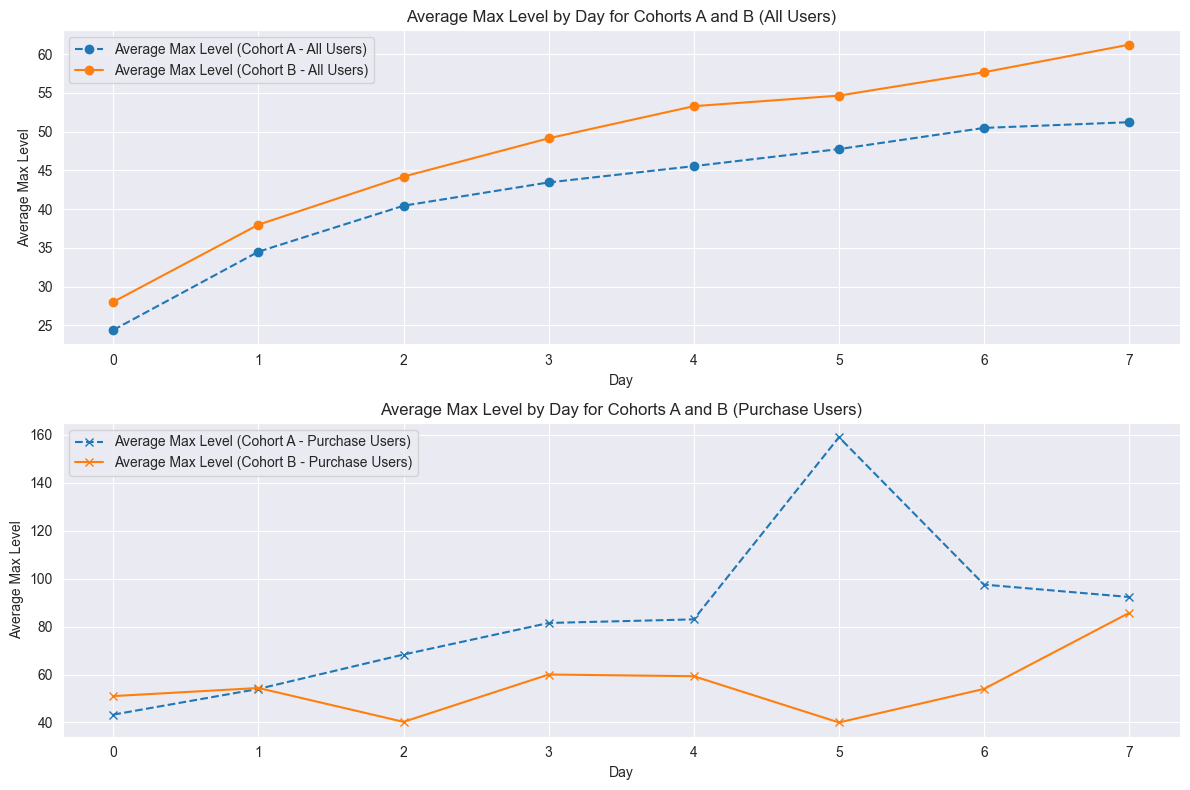

In [13]:
# 3.2 AVG MaxLevelPassed by day graph
# Строим графики изменения среднего максимального уровня по дням для когорт A и B для всех пользователей и пользователей с покупками

plt.figure(figsize=(12, 8))
days = range(8)

# Графики для всех пользователей
plt.subplot(211)
plt.plot(days, avg_max_level_A_by_day_all, label='Average Max Level (Cohort A - All Users)',linestyle='--', marker='o')
plt.plot(days, avg_max_level_B_by_day_all, label='Average Max Level (Cohort B - All Users)', marker='o')

plt.title('Average Max Level by Day for Cohorts A and B (All Users)')
plt.xlabel('Day')
plt.ylabel('Average Max Level')
plt.legend()
plt.grid(True)

# Графики для пользователей с покупками
plt.subplot(212)
plt.plot(days, avg_max_level_A_by_day_purchase, label='Average Max Level (Cohort A - Purchase Users)', linestyle='--', marker='x')
plt.plot(days, avg_max_level_B_by_day_purchase, label='Average Max Level (Cohort B - Purchase Users)',  marker='x')

plt.title('Average Max Level by Day for Cohorts A and B (Purchase Users)')
plt.xlabel('Day')
plt.ylabel('Average Max Level')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Отображение графиков
plt.show()


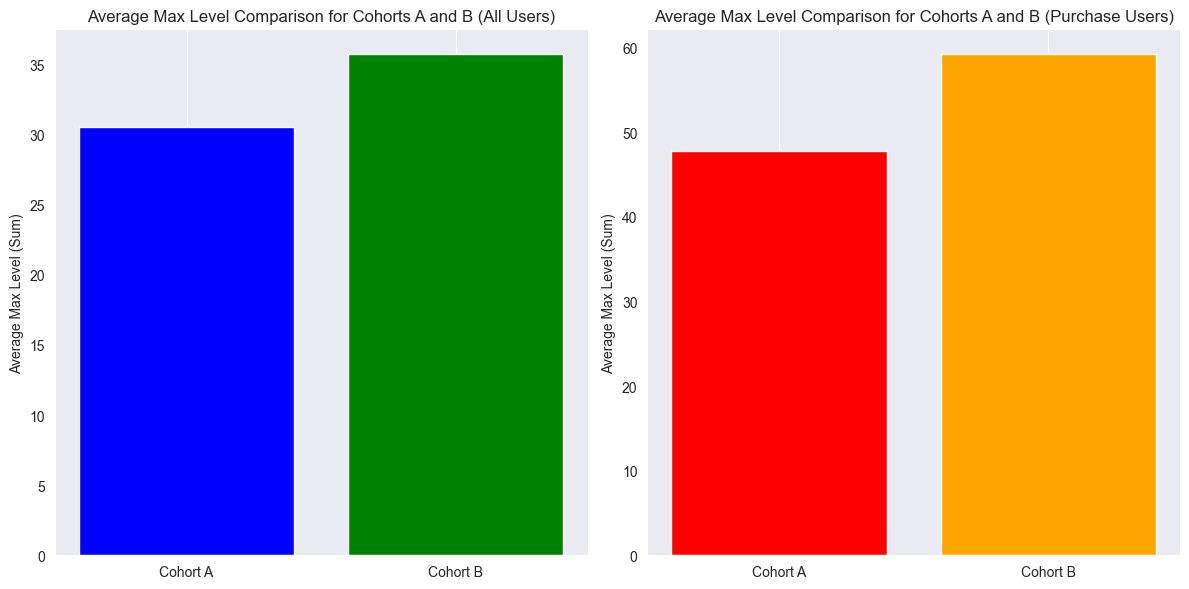

In [14]:
# 3.2 AVG MaxLevelPassed sum graph
# Строим гистограмму сравнения суммарных результатов для когорт A и B
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Создаем список меток и суммарных значений для среднего максимального уровня
cohort_labels = ['Cohort A', 'Cohort B']
avg_max_levels_all_users = [avg_max_level_A_all, avg_max_level_B_all]
avg_max_levels_purchase_users = [avg_max_level_A_purchase, avg_max_level_B_purchase]

# Гистограмма для всех пользователей
plt.subplot(1, 2, 1)
plt.bar(cohort_labels, avg_max_levels_all_users, color=['blue', 'green'])
plt.title('Average Max Level Comparison for Cohorts A and B (All Users)')
plt.ylabel('Average Max Level (Sum)')
plt.grid(axis='y')

# Гистограмма для пользователей с покупками
plt.subplot(1, 2, 2)
plt.bar(cohort_labels, avg_max_levels_purchase_users, color=['red', 'orange'])
plt.title('Average Max Level Comparison for Cohorts A and B (Purchase Users)')
plt.ylabel('Average Max Level (Sum)')
plt.grid(axis='y')

# Отображение гистограмм
plt.tight_layout()
plt.show()


In [15]:
# 4.1 AVG amount of gold received
# Функция для расчета среднего количества золота
def calculate_avg_gold(data):
    # Группируем данные по Retention и User_id, затем находим сумму для полей, начинающихся с 'Get_'
    sum_gold_by_day_user = data.groupby(['Retention', 'User_id'])[data.columns[data.columns.str.startswith('Get_')]].sum().reset_index()

    # Затем группируем полученные данные по Retention и находим среднее значение для полей, начинающихся с 'Get_'
    avg_gold_by_cohort_day = sum_gold_by_day_user.groupby('Retention')[data.columns[data.columns.str.startswith('Get_')]].mean().reset_index()

    # Вычисляем среднее количество золота за 7 дней для всех пользователей
    avg_gold_all_day = sum_gold_by_day_user.groupby('User_id')[data.columns[data.columns.str.startswith('Get_')]].sum().mean()

    return avg_gold_by_cohort_day, avg_gold_all_day

# Вычисляем среднее количество золота для всех пользователей и пользователей с покупками
avg_gold_cohort_A_all_users, avg_gold_cohort_A_all_users_all_day = calculate_avg_gold(data_cohort_A)
avg_gold_cohort_B_all_users, avg_gold_cohort_B_all_users_all_day = calculate_avg_gold(data_cohort_B)

# Фильтруем данные для пользователей с покупками
data_cohort_A_purchase = data_cohort_A[data_cohort_A['CountBuy'] > 0]
data_cohort_B_purchase = data_cohort_B[data_cohort_B['CountBuy'] > 0]

# Вычисляем среднее количество золота для пользователей с покупками
avg_gold_cohort_A_purchase_users, avg_gold_cohort_A_purchase_users_all_day = calculate_avg_gold(data_cohort_A_purchase)
avg_gold_cohort_B_purchase_users, avg_gold_cohort_B_purchase_users_all_day = calculate_avg_gold(data_cohort_B_purchase)

# Вывести результаты
print("Average Gold cohort_A (All Users):\n", avg_gold_cohort_A_all_users,avg_gold_cohort_A_all_users.shape)
print("Total Average Gold cohort_A (All Users):\n", avg_gold_cohort_A_all_users_all_day,avg_gold_cohort_A_all_users_all_day.shape)
print("Average Gold cohort_B (All Users):\n", avg_gold_cohort_B_all_users, avg_gold_cohort_B_all_users.shape)
print("Total Average Gold cohort_B (All Users):\n", avg_gold_cohort_B_all_users_all_day,avg_gold_cohort_B_all_users_all_day.shape)

print("Average Gold cohort_A (Purchase Users):\n", avg_gold_cohort_A_purchase_users,avg_gold_cohort_A_purchase_users.shape)
print("Total Average Gold cohort_A (Purchase Users):\n", avg_gold_cohort_A_purchase_users_all_day,avg_gold_cohort_A_purchase_users_all_day.shape)
print("Average Gold cohort_B (Purchase Users):\n", avg_gold_cohort_B_purchase_users,avg_gold_cohort_B_purchase_users.shape)
print("Total Average Gold cohort_B (Purchase Users):\n", avg_gold_cohort_B_purchase_users_all_day,avg_gold_cohort_B_purchase_users_all_day.shape)


Average Gold cohort_A (All Users):
    Retention    Get_Ads  Get_Chapter    Get_Buy   Get_Faceb  Get_TeamL  \
0          0   4.169562    16.224230  23.835997  121.380588   1.287931   
1          1  14.156080    34.573503  25.710829   37.507562   2.462190   
2          2  11.624441    35.037258  26.788376   11.922504   3.614009   
3          3  12.161052    30.238291   9.860312    9.860312   3.985210   
4          4  12.749350    23.148309  22.549870    6.938422   3.122290   
5          5   8.776844    19.066293  17.086835    5.602241   3.426704   
6          6  10.504634    25.149331  25.231720    6.179197   2.502575   
7          7  10.000000    19.875000  11.458333    6.250000   2.187500   

   Get_TeamT  
0  13.643734  
1  13.127647  
2   6.035768  
3   4.272802  
4   2.428448  
5   2.707750  
6   2.162719  
7   1.562500   (8, 7)
Total Average Gold cohort_A (All Users):
 Get_Ads         26.609936
Get_Chapter     69.369825
Get_Buy         62.821987
Get_Faceb      147.194112
Get_TeamL

<Figure size 1600x1200 with 0 Axes>

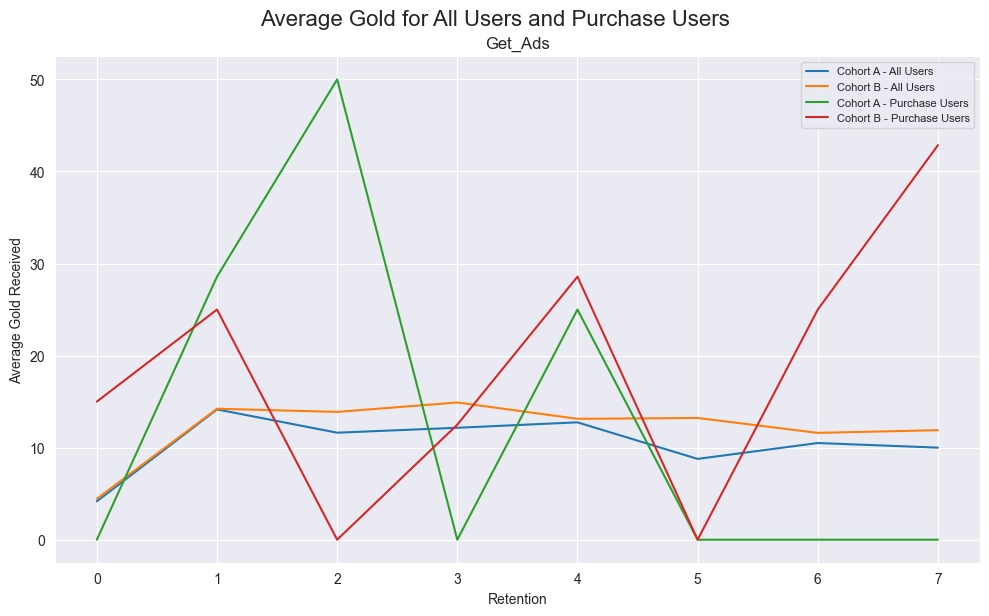

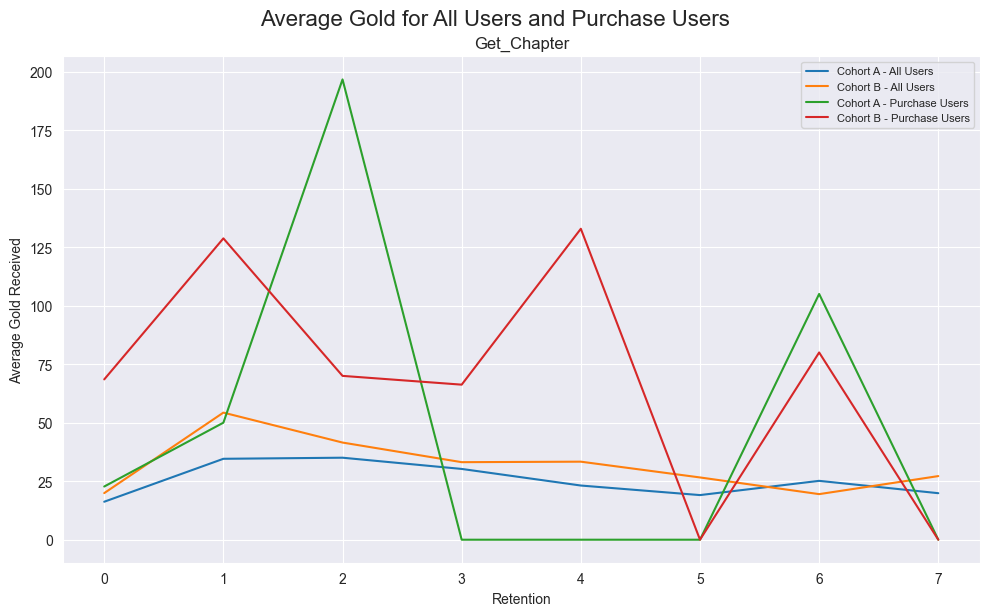

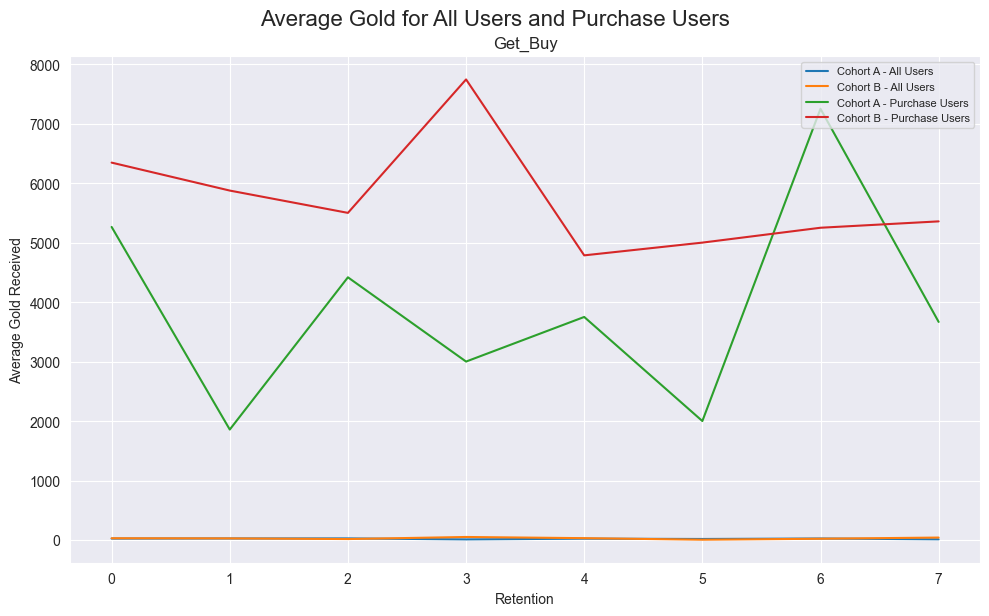

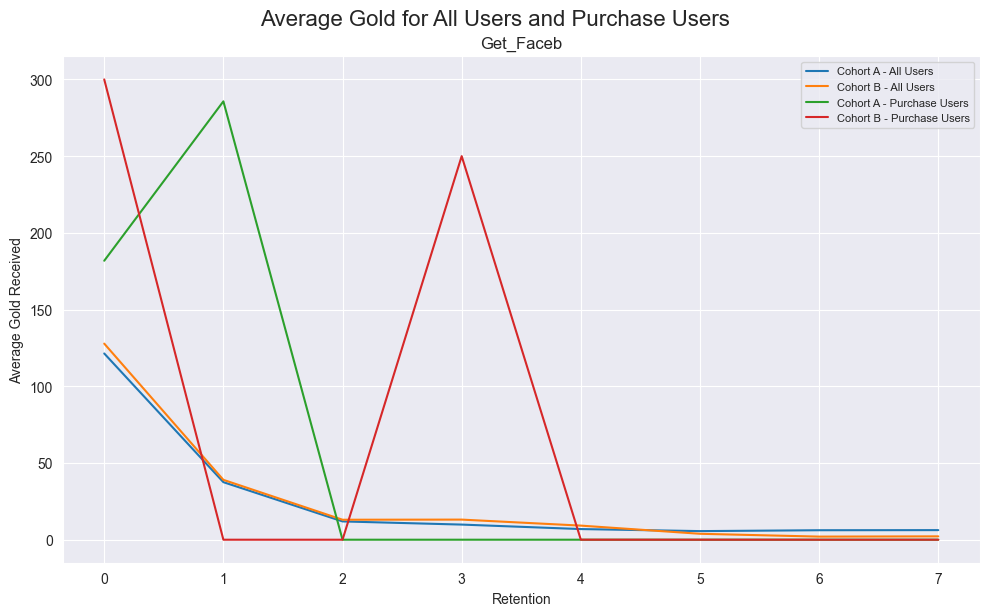

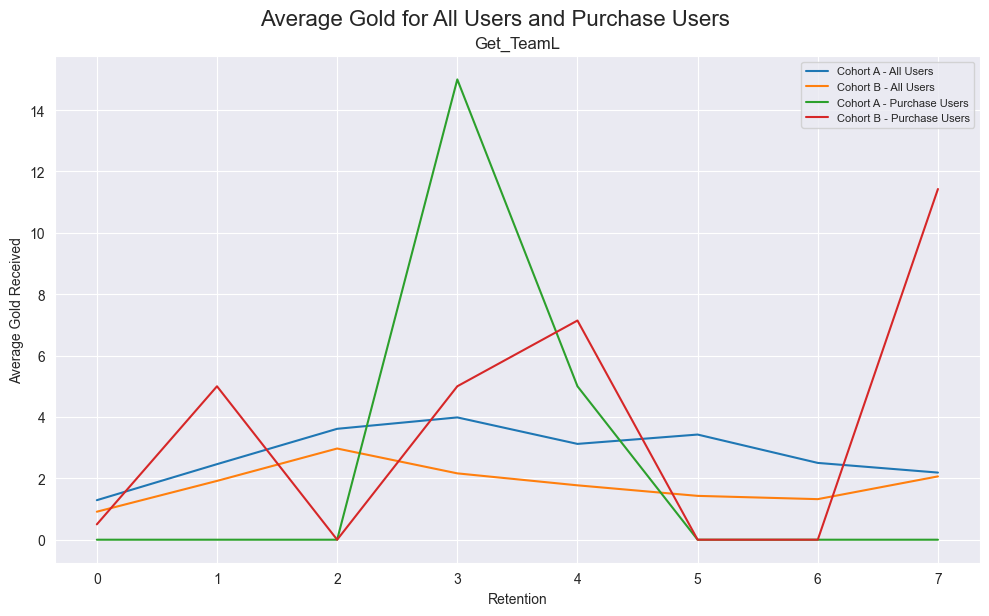

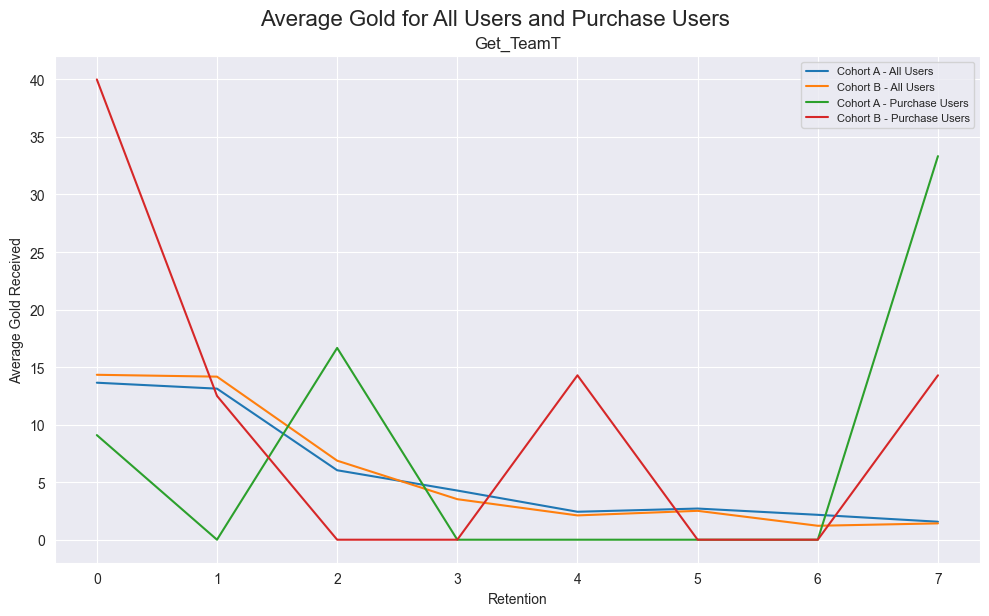

In [16]:
# 4.2 AVG amount of gold received graph
# Функция для построения графиков по всем столбцам
def plot_avg_gold_all_columns(avg_gold_data, title):
    columns = avg_gold_data[0].columns[1:]  # Выбираем все столбцы кроме 'Retention'

    plt.figure(figsize=(16, 12))

    for i, col in enumerate(columns):
        plt.figure(figsize=(10, 6))  # Увеличим размер графиков
        plt.plot(avg_gold_data[0]['Retention'], avg_gold_data[0][col], label='Cohort A - All Users')
        plt.plot(avg_gold_data[1]['Retention'], avg_gold_data[1][col], label='Cohort B - All Users')
        plt.plot(avg_gold_data[2]['Retention'], avg_gold_data[2][col], label='Cohort A - Purchase Users')
        plt.plot(avg_gold_data[3]['Retention'], avg_gold_data[3][col], label='Cohort B - Purchase Users')
        plt.title(col)
        plt.xlabel('Retention')
        plt.ylabel('Average Gold Received')
        plt.legend(loc='upper right', prop={'size': 8})  # Перемести легенду в правый верхний угол и уменьши размер
        plt.grid(True)
        plt.tight_layout()
        plt.suptitle(title, fontsize=16, y=1.02)

# Графики для среднего количества золота по всем столбцам для всех пользователей и пользователей с покупками
all_users_data = [avg_gold_cohort_A_all_users, avg_gold_cohort_B_all_users,
                  avg_gold_cohort_A_purchase_users, avg_gold_cohort_B_purchase_users]
plot_avg_gold_all_columns(all_users_data, 'Average Gold for All Users and Purchase Users')

plt.show()  # Показать все графики


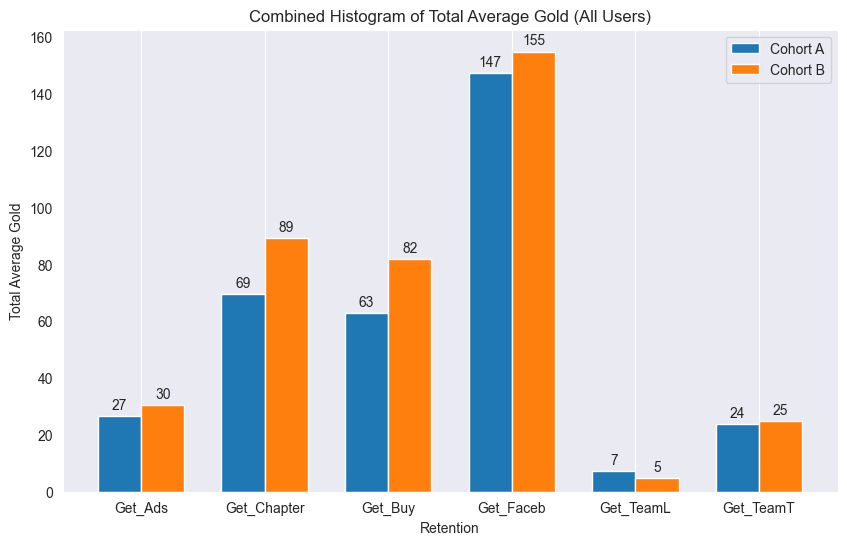

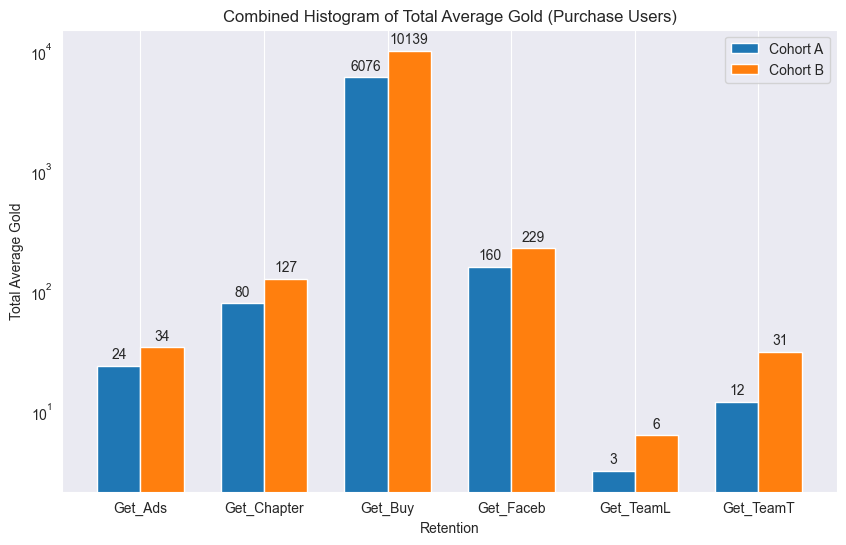

In [17]:
# 4.3 AVG amount of gold received graph
# Функция для построения гистограммы для двух когорт с подписями
def plot_combined_histograms_with_labels(cohort_A_data, cohort_B_data, title, xlabel, ylabel, labels, log_scale=False):
    plt.figure(figsize=(10, 6))

    bar_width = 0.35
    x = np.arange(len(cohort_A_data))

    bars_A = plt.bar(x - bar_width/2, cohort_A_data, bar_width, label=labels[0])
    bars_B = plt.bar(x + bar_width/2, cohort_B_data, bar_width, label=labels[1])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(x, cohort_A_data.index)
    plt.legend()
    plt.grid(axis='y')

    if log_scale:
        plt.yscale('log')

    # Добавляем подписи значений в каждом столбце (округленные до целых)
    for bar_A, bar_B in zip(bars_A, bars_B):
        height_A = bar_A.get_height()
        height_B = bar_B.get_height()
        plt.annotate(f'{int(round(height_A))}',  # Округляем до целых
                     xy=(bar_A.get_x() + bar_A.get_width() / 2, height_A),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

        plt.annotate(f'{int(round(height_B))}',  # Округляем до целых
                     xy=(bar_B.get_x() + bar_B.get_width() / 2, height_B),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

    plt.show()

# Объединенные гистограммы для среднего количества золота за 7 дней для когорт A и B с логарифмической шкалой
plot_combined_histograms_with_labels(
    avg_gold_cohort_A_all_users_all_day,
    avg_gold_cohort_B_all_users_all_day,
    'Combined Histogram of Total Average Gold (All Users)',
    'Retention',
    'Total Average Gold',
    labels=['Cohort A', 'Cohort B']
)

plot_combined_histograms_with_labels(
    avg_gold_cohort_A_purchase_users_all_day,
    avg_gold_cohort_B_purchase_users_all_day,
    'Combined Histogram of Total Average Gold (Purchase Users)',
    'Retention',
    'Total Average Gold',
    labels=['Cohort A', 'Cohort B'],
    log_scale=True  # Добавляем логарифмическую шкалу
)
